# L²Space Demo: Hilbert Spaces on Intervals

This notebook demonstrates the `L2Space` class, which provides L² Hilbert spaces on interval domains. L² spaces form the foundation for more specialized function spaces like Sobolev spaces.

In [1]:
# Necessary imports
import sys
import numpy as np
import matplotlib.pyplot as plt

# Core imports from pygeoinf
from pygeoinf.interval.interval_domain import IntervalDomain
from pygeoinf.interval.l2_space import L2Space
from pygeoinf.interval.l2_functions import Function

/home/adrian/PhD/Inferences/pygeoinf/pygeoinf/random_matrix.py:6: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.linalg import (


## 1. Creating L²Spaces with Different Basis Types

The new API uses `IntervalDomain` objects to specify both the geometric domain and boundary conditions.

In [2]:
print("=== Creating L²Spaces with Different Basis Types ===")
print()

# 1. Fourier basis on periodic domain
fourier_domain = IntervalDomain(0, 2*np.pi)
fourier_space = L2Space(8, fourier_domain, basis_type='fourier')

print(f"1. Fourier L²Space:")
print(f"   Domain: {fourier_space.function_domain}")
print(f"   Dimension: {fourier_space.dim}")
print(f"   Basis type: Fourier (complex exponentials)")
print()

# 2. Hat basis
hat_domain = IntervalDomain(0, 1)
hat_space = L2Space(6, hat_domain, basis_type='hat')

print(f"2. Hat Function L²Space:")
print(f"   Domain: {hat_space.function_domain}")
print(f"   Dimension: {hat_space.dim}")
print(f"   Basis type: Hat functions (piecewise linear)")
print()

# Show what basis functions look like
print("=== Basis Function Overview ===")
print()

print("Fourier basis functions (first few):")
for i in range(min(4, fourier_space.dim)):
    basis_func = fourier_space.get_basis_function(i)
    print(f"   φ_{i}: {basis_func.name}")

print()
print("Hat basis functions (first few):")
for i in range(min(4, hat_space.dim)):
    basis_func = hat_space.get_basis_function(i)
    print(f"   φ_{i}: {basis_func.name}")

print()
print("✓ L²spaces can use different orthogonal basis families")
print("✓ Fourier bases are ideal for periodic phenomena")
print("✓ Hat bases are good for approximating functions with localized features")

=== Creating L²Spaces with Different Basis Types ===

1. Fourier L²Space:
   Domain: [0.0, 6.283185307179586]
   Dimension: 8
   Basis type: Fourier (complex exponentials)

2. Hat Function L²Space:
   Domain: [0.0, 1.0]
   Dimension: 6
   Basis type: Hat functions (piecewise linear)

=== Basis Function Overview ===

Fourier basis functions (first few):
   φ_0: fourier_const
   φ_1: fourier_cos_1
   φ_2: fourier_sin_1
   φ_3: fourier_cos_2

Hat basis functions (first few):
   φ_0: hat_0(x=0.000)
   φ_1: hat_1(x=0.200)
   φ_2: hat_2(x=0.400)
   φ_3: hat_3(x=0.600)

✓ L²spaces can use different orthogonal basis families
✓ Fourier bases are ideal for periodic phenomena
✓ Hat bases are good for approximating functions with localized features


## 2. L²Space Basis Type Features

L²Space focuses purely on basis functions and mathematical operations. Boundary conditions are handled separately by higher-level spaces like SobolevSpace when needed.

In [3]:
print("=== L²Space Basis Type Features ===")

# Test different basis types
basis_tests = [
    ("Fourier basis", "fourier"),
    ("Hat basis", "hat"),
    ("Homogeneous hat basis", "hat_homogeneous")
]

print("Available basis types for L²Space:")
for name, basis_type in basis_tests:
    try:
        test_domain = IntervalDomain(0, 1)
        test_space = L2Space(5, test_domain, basis_type=basis_type)
        print(f"   ✓ {name}: Successfully created")
        print(f"     Dimension: {test_space.dim}, Basis: {test_space.basis_type}")
    except ValueError as e:
        print(f"   ✗ {name}: {e}")

print()
print("L²Space features:")

# Create a test space to show features
domain = IntervalDomain(0, 2*np.pi)
space = L2Space(6, domain, basis_type='fourier')

print(f"   Domain: {space.function_domain}")
print(f"   Dimension: {space.dim}")
print(f"   Basis functions: {len(space.basis_functions)} available")
print(f"   Gram matrix shape: {space.gram_matrix.shape}")

print()
print("✓ L²Space provides clean basis function mathematics!")
print("✓ Domain properties accessible through function_domain!")

=== L²Space Basis Type Features ===
Available basis types for L²Space:
   ✓ Fourier basis: Successfully created
     Dimension: 5, Basis: fourier
   ✓ Hat basis: Successfully created
     Dimension: 5, Basis: hat
   ✓ Homogeneous hat basis: Successfully created
     Dimension: 5, Basis: hat_homogeneous

L²Space features:
   Domain: [0.0, 6.283185307179586]
   Dimension: 6
   Basis functions: 6 available


/home/adrian/PhD/Inferences/pygeoinf/pygeoinf/interval/l2_functions.py:263: UserWarning: Point evaluation is not well-defined for general L² functions. Consider using a Sobolev space with s > 1/2 for point evaluation.
  warnings.warn(


   Gram matrix shape: (6, 6)

✓ L²Space provides clean basis function mathematics!
✓ Domain properties accessible through function_domain!


## 3. Basis Function Visualization

Let's visualize the different types of basis functions and see how they respect boundary conditions.

=== Visualizing Basis Functions ===


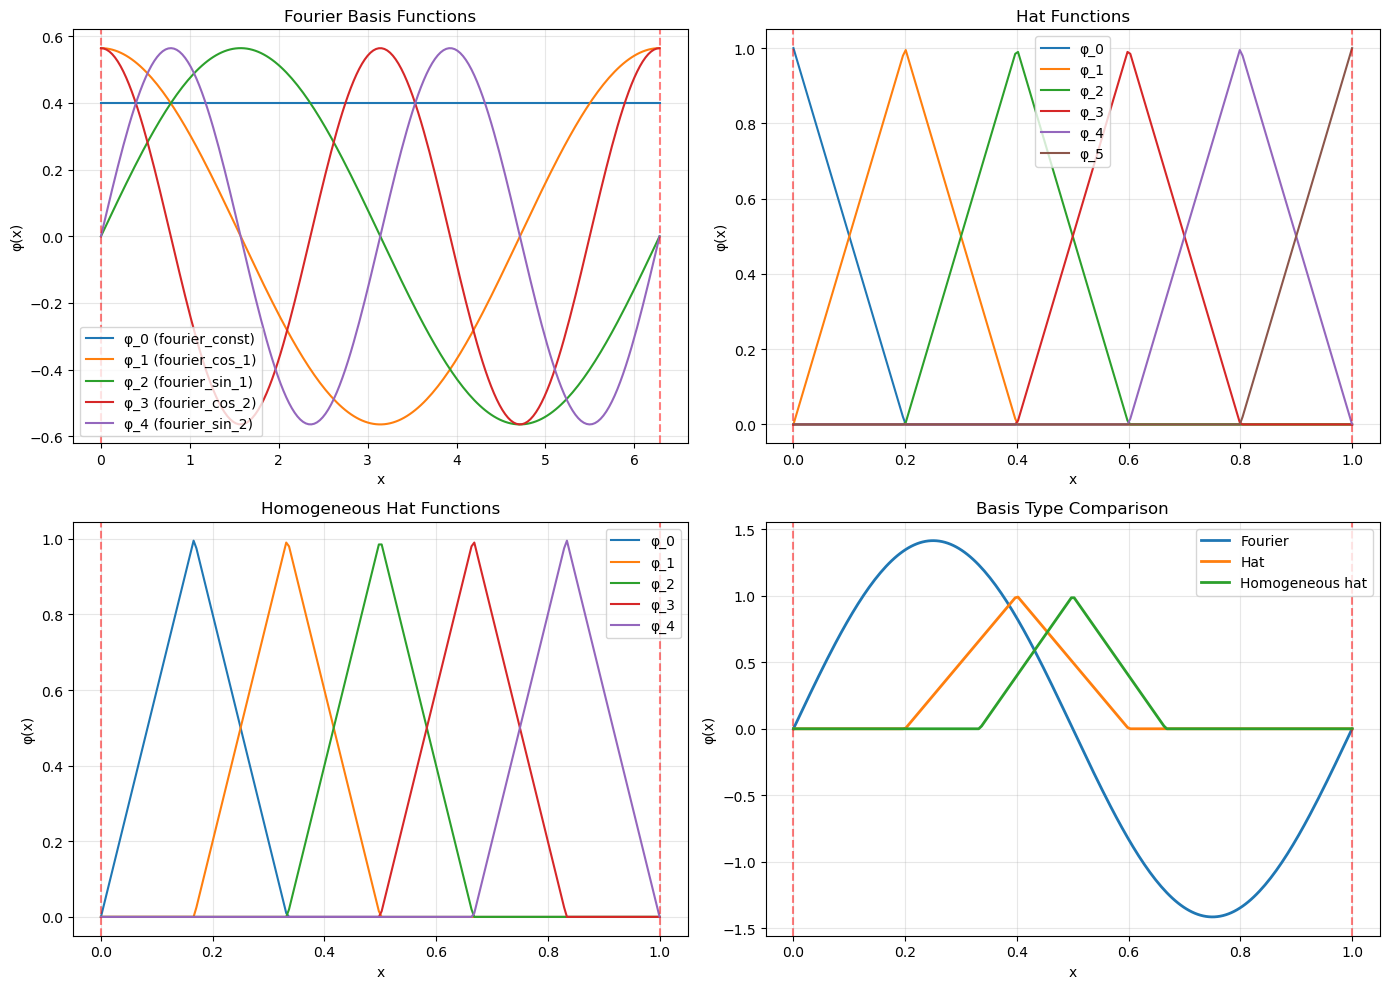

In [4]:
print("=== Visualizing Basis Functions ===")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Fourier basis functions
ax = axes[0, 0]
fourier_domain = IntervalDomain(0, 2*np.pi)
fourier_space = L2Space(6, fourier_domain, basis_type='fourier')

x = np.linspace(0, 2*np.pi, 200)
for i in range(min(5, fourier_space.dim)):
    basis_func = fourier_space.get_basis_function(i)
    y = np.array([basis_func.evaluate(xi) for xi in x])
    ax.plot(x, y, label=f'φ_{i} ({basis_func.name})')

ax.set_title('Fourier Basis Functions')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5, label='Domain boundaries')
ax.axvline(2*np.pi, color='red', linestyle='--', alpha=0.5)

# 2. Hat functions
ax = axes[0, 1]
hat_domain = IntervalDomain(0, 1)
hat_space = L2Space(6, hat_domain, basis_type='hat')

x = np.linspace(0, 1, 200)
for i in range(min(6, hat_space.dim)):
    basis_func = hat_space.get_basis_function(i)
    y = np.array([basis_func.evaluate(xi) for xi in x])
    ax.plot(x, y, label=f'φ_{i}')

ax.set_title('Hat Functions')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.axvline(1, color='red', linestyle='--', alpha=0.5)

# 3. Homogeneous hat functions
ax = axes[1, 0]
homogeneous_domain = IntervalDomain(0, 1)
homogeneous_space = L2Space(5, homogeneous_domain, basis_type='hat_homogeneous')

x = np.linspace(0, 1, 200)
for i in range(homogeneous_space.dim):
    basis_func = homogeneous_space.get_basis_function(i)
    y = np.array([basis_func.evaluate(xi) for xi in x])
    ax.plot(x, y, label=f'φ_{i}')

ax.set_title('Homogeneous Hat Functions')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.axvline(1, color='red', linestyle='--', alpha=0.5)

# 4. Comparison of different basis types
ax = axes[1, 1]

# Sample one function from each type
x = np.linspace(0, 1, 200)

# Fourier on [0,1]
fourier_test = L2Space(4, IntervalDomain(0, 1), basis_type='fourier')
fourier_func = fourier_test.get_basis_function(2)  # A sine function
y_fourier = np.array([fourier_func.evaluate(xi) for xi in x])
ax.plot(x, y_fourier, label='Fourier', linewidth=2)

# Hat function
hat_func = hat_space.get_basis_function(2)  # Interior hat function
y_hat = np.array([hat_func.evaluate(xi) for xi in x])
ax.plot(x, y_hat, label='Hat', linewidth=2)

# Homogeneous hat function
homog_func = homogeneous_space.get_basis_function(2)
y_homog = np.array([homog_func.evaluate(xi) for xi in x])
ax.plot(x, y_homog, label='Homogeneous hat', linewidth=2)

ax.set_title('Basis Type Comparison')
ax.set_xlabel('x')
ax.set_ylabel('φ(x)')
ax.grid(True, alpha=0.3)
ax.legend()
ax.axvline(0, color='red', linestyle='--', alpha=0.5)
ax.axvline(1, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 4. L² Inner Products and Gram Matrix

The L² inner product is computed via numerical integration: ⟨u,v⟩_L² = ∫_a^b u(x)v(x) dx

=== L² Inner Products and Gram Matrix ===

L²Space: 5-dimensional Fourier space on [0.0, 6.283185307179586]

Manual inner product computations (first few):
   ⟨φ_0, φ_0⟩_L² = 1.000000
   ⟨φ_0, φ_1⟩_L² = -0.000000
   ⟨φ_0, φ_2⟩_L² = -0.000000
   ⟨φ_1, φ_1⟩_L² = 1.000000
   ⟨φ_1, φ_2⟩_L² = 0.000000
   ⟨φ_2, φ_2⟩_L² = 1.000000

Full Gram matrix (automatically computed and cached):
Gram matrix shape: (5, 5)
Gram matrix:
[[ 1.00000000e+00 -5.55111512e-17 -5.55111512e-17 -4.85722573e-17
  -2.77555756e-17]
 [-5.55111512e-17  1.00000000e+00  5.55111512e-17 -9.71445147e-17
  -5.55111512e-17]
 [-5.55111512e-17  5.55111512e-17  1.00000000e+00  2.77555756e-17
  -2.77555756e-17]
 [-4.85722573e-17 -9.71445147e-17  2.77555756e-17  1.00000000e+00
  -2.10335221e-17]
 [-2.77555756e-17 -5.55111512e-17 -2.77555756e-17 -2.10335221e-17
   1.00000000e+00]]

Properties of the Gram matrix:
   Symmetric: True
   Positive definite: True
   Condition number: 1.00e+00


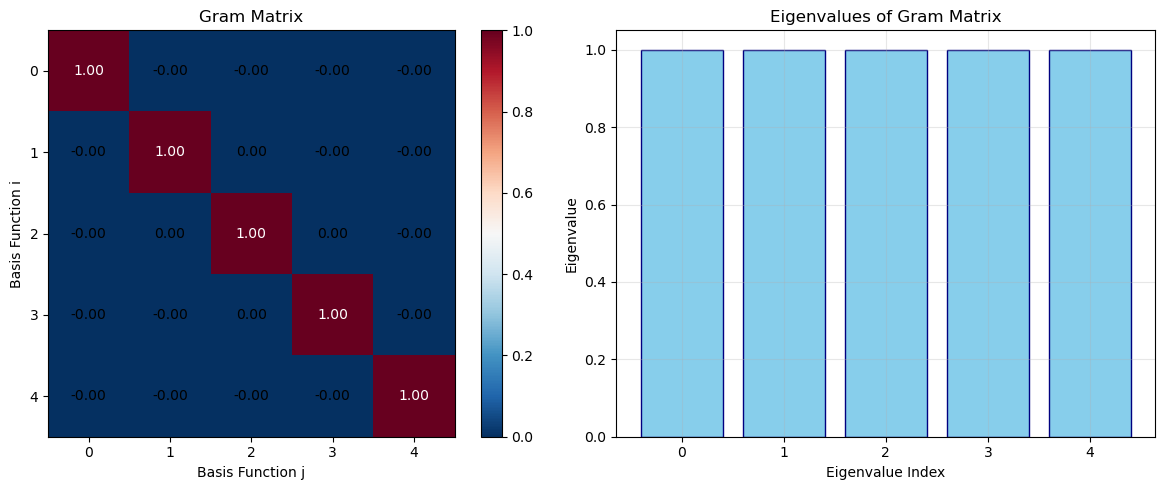


✓ Fourier basis functions are orthonormal ⟹ Gram matrix ≈ Identity


In [5]:
print("=== L² Inner Products and Gram Matrix ===")
print()

# Create a small Fourier space for demonstration
domain = IntervalDomain(0, 2*np.pi)
space = L2Space(5, domain, basis_type='fourier')

print(f"L²Space: {space.dim}-dimensional Fourier space on {space.function_domain}")
print()

# Manually compute some inner products to see the structure
print("Manual inner product computations (first few):")
for i in range(min(3, space.dim)):
    for j in range(i, min(3, space.dim)):
        # Get the basis functions directly
        phi_i = space.get_basis_function(i)
        phi_j = space.get_basis_function(j)

        # Compute inner product directly between basis functions
        inner_prod = space.inner_product(phi_i, phi_j)
        print(f"   ⟨φ_{i}, φ_{j}⟩_L² = {inner_prod:.6f}")

print()

# Access the automatically computed Gram matrix
gram_matrix = space.gram_matrix
print("Full Gram matrix (automatically computed and cached):")
print(f"Gram matrix shape: {gram_matrix.shape}")
print("Gram matrix:")
print(gram_matrix)

print()

# Check properties of the Gram matrix
print("Properties of the Gram matrix:")

# Check if it's symmetric
is_symmetric = np.allclose(gram_matrix, gram_matrix.T, atol=1e-12)
print(f"   Symmetric: {is_symmetric}")

# Check if it's positive definite by looking at eigenvalues
eigenvals = np.linalg.eigvals(gram_matrix)
is_positive_definite = np.all(eigenvals > 1e-12)
print(f"   Positive definite: {is_positive_definite}")

# Condition number
cond_number = np.linalg.cond(gram_matrix)
print(f"   Condition number: {cond_number:.2e}")

# Visualize the Gram matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gram matrix heatmap
ax = axes[0]
im = ax.imshow(gram_matrix, cmap='RdBu_r', aspect='equal')
ax.set_title('Gram Matrix')
ax.set_xlabel('Basis Function j')
ax.set_ylabel('Basis Function i')
plt.colorbar(im, ax=ax)

# Add text annotations for small matrices
if space.dim <= 8:
    for i in range(space.dim):
        for j in range(space.dim):
            ax.text(j, i, f'{gram_matrix[i,j]:.2f}',
                   ha='center', va='center',
                   color='white' if abs(gram_matrix[i,j]) > 0.5 else 'black')

# Eigenvalues
ax = axes[1]
ax.bar(range(len(eigenvals)), eigenvals, color='skyblue', edgecolor='navy')
ax.set_title('Eigenvalues of Gram Matrix')
ax.set_xlabel('Eigenvalue Index')
ax.set_ylabel('Eigenvalue')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print()
print("✓ Fourier basis functions are orthonormal ⟹ Gram matrix ≈ Identity")

## 5. Function Projection and Approximation

One of the key features of L²spaces is the ability to project arbitrary functions onto finite-dimensional subspaces.

=== Function Projection and Approximation ===

Projecting onto 4-dimensional Fourier space...
   L² approximation error: 0.676290
Projecting onto 8-dimensional Fourier space...
   L² approximation error: 0.354860
Projecting onto 16-dimensional Fourier space...
   L² approximation error: 0.040782


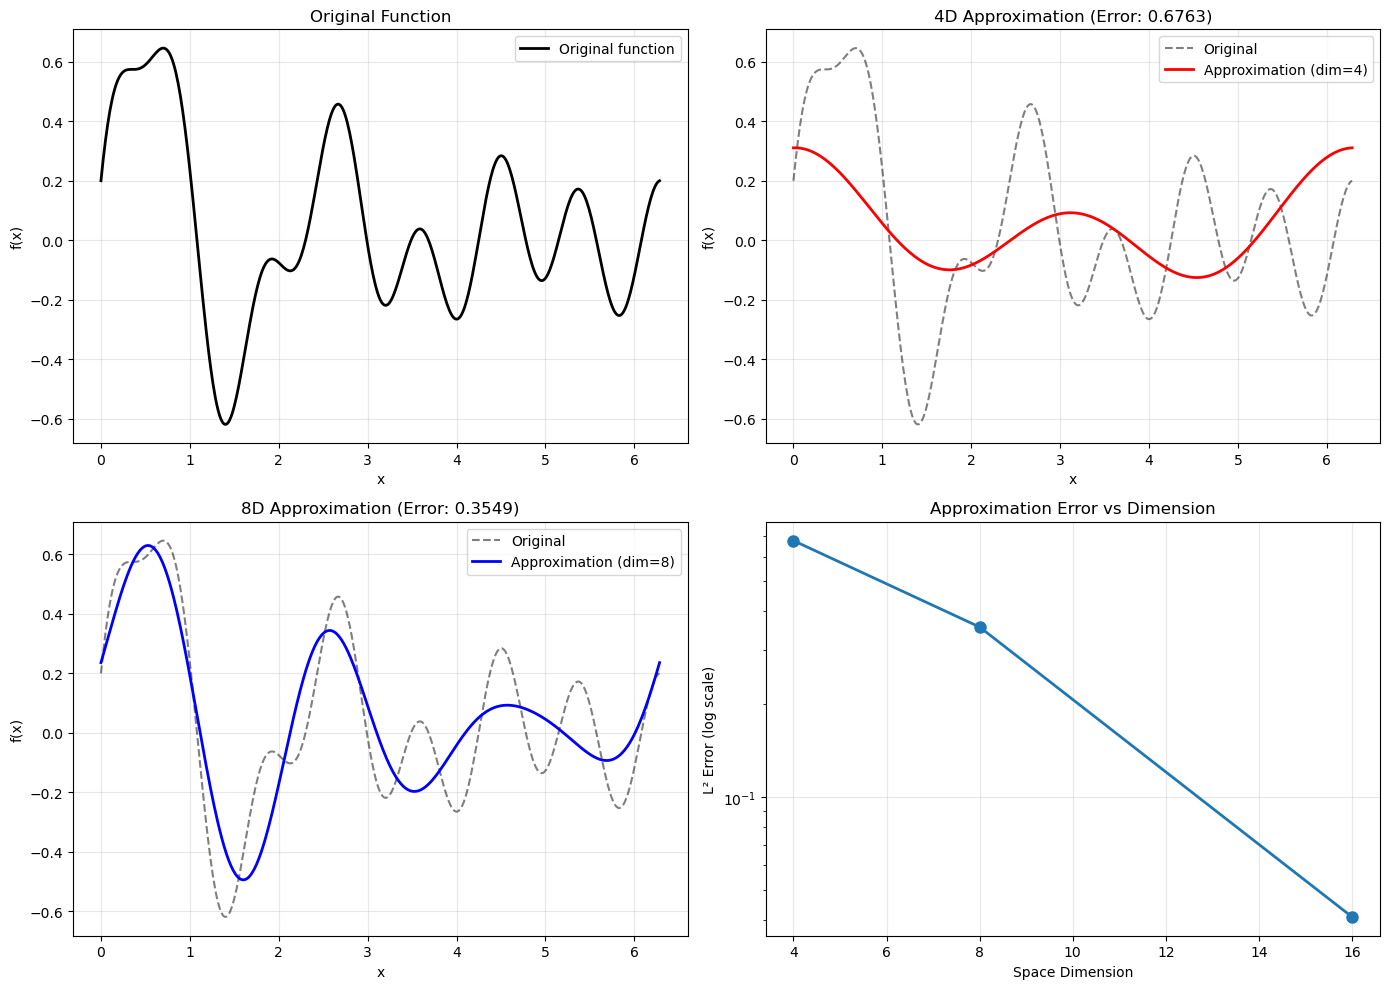


✓ Higher dimensional spaces provide better approximations
✓ L² error decreases as dimension increases


In [6]:
print("=== Function Projection and Approximation ===")
print()

# Define a test function to approximate
def test_function(x):
    return np.sin(3*x) * np.exp(-0.5*x) + 0.2*np.cos(7*x)

# Create L²spaces with different dimensions
domain = IntervalDomain(0, 2*np.pi)
dimensions = [4, 8, 16]
spaces = [L2Space(dim, domain, basis_type='fourier') for dim in dimensions]

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x_fine = np.linspace(0, 2*np.pi, 500)
y_true = test_function(x_fine)

# Plot original function
ax = axes[0, 0]
ax.plot(x_fine, y_true, 'k-', linewidth=2, label='Original function')
ax.set_title('Original Function')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid(True, alpha=0.3)
ax.legend()

# Plot approximations for different dimensions
colors = ['red', 'blue', 'green']
errors = []

for i, (space, color) in enumerate(zip(spaces, colors)):
    print(f"Projecting onto {space.dim}-dimensional Fourier space...")

    # Project the function
    projected_func = space.project(test_function)

    # Evaluate the projection
    y_approx = np.array([projected_func.evaluate(xi) for xi in x_fine])

    # Calculate L² error using numerical integration
    def error_function(x):
        return (projected_func.evaluate(x) - test_function(x))**2

    error_squared = domain.integrate(error_function)
    error = np.sqrt(error_squared)
    errors.append(error)

    print(f"   L² approximation error: {error:.6f}")

    # Plot approximation for first two dimensions
    if i < 2:
        ax_idx = (0, 1) if i == 0 else (1, 0)
        ax = axes[ax_idx]
        ax.plot(x_fine, y_true, 'k--', alpha=0.5, label='Original')
        ax.plot(x_fine, y_approx, color=color, linewidth=2,
                label=f'Approximation (dim={space.dim})')
        ax.set_title(f'{space.dim}D Approximation (Error: {error:.4f})')
        ax.set_xlabel('x')
        ax.set_ylabel('f(x)')
        ax.grid(True, alpha=0.3)
        ax.legend()

# Plot error convergence in the bottom right panel
ax = axes[1, 1]
ax.semilogy(dimensions, errors, 'o-', linewidth=2, markersize=8)
ax.set_title('Approximation Error vs Dimension')
ax.set_xlabel('Space Dimension')
ax.set_ylabel('L² Error (log scale)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print()
print("✓ Higher dimensional spaces provide better approximations")
print("✓ L² error decreases as dimension increases")

## 6. Coefficient Representation and Linear Algebra

Functions in finite-dimensional L²spaces can be represented as coefficient vectors.

In [7]:
print("=== Coefficient Representation and Linear Algebra ===")
print()

# Create a small space for demonstration
domain = IntervalDomain(0, 2*np.pi)
space = L2Space(6, domain, basis_type='fourier')

# Define a simple function
def simple_func(x):
    return np.sin(x) + 0.5*np.cos(2*x)

print(f"Working with {space.dim}D Fourier space on {space.function_domain}")
print()

# Project the function and get coefficients
projected_func = space.project(simple_func)
coefficients = space._to_components(projected_func)

print("Function projection and coefficient extraction:")
print(f"   Coefficient vector: {coefficients}")
print(f"   Vector shape: {coefficients.shape}")
print(f"   Vector norm: {np.linalg.norm(coefficients):.6f}")
print()

# Create another function using coefficients directly
print("Creating functions from coefficient vectors:")

# Method 1: From coefficients array
test_coeffs = np.array([1.0, 0.5, -0.3, 0.2, 0.0, -0.1])
func_from_coeffs = space._from_components(test_coeffs)

print(f"   Created function with coefficients: {test_coeffs}")

# Method 2: Using Function constructor
direct_func = Function(space, coefficients=test_coeffs)

print(f"   Both methods create equivalent functions: {np.allclose(func_from_coeffs.coefficients, direct_func.coefficients)}")
print()

# Linear algebra operations
print("Linear algebra in coefficient space:")
c1 = coefficients
c2 = test_coeffs[:len(coefficients)]  # Ensure same dimension

# Addition
c_sum = c1 + c2
func_sum = space._from_components(c_sum)
print(f"   Addition: ||c1 + c2|| = {np.linalg.norm(c_sum):.6f}")

# Scalar multiplication
alpha = 2.5
c_scaled = alpha * c1
func_scaled = space._from_components(c_scaled)
print(f"   Scaling: ||{alpha} * c1|| = {np.linalg.norm(c_scaled):.6f}")

# Inner product
inner_prod = np.dot(c1, c2)
print(f"   Inner product: ⟨c1, c2⟩ = {inner_prod:.6f}")

print()
print("✓ Coefficient vectors enable efficient linear algebra operations")
print("✓ Function space operations correspond to vector space operations")

=== Coefficient Representation and Linear Algebra ===

Working with 6D Fourier space on [0.0, 6.283185307179586]

Function projection and coefficient extraction:
   Coefficient vector: [ 3.04146936e-17 -2.06587899e-16  1.77245385e+00  8.86226925e-01
  1.23347102e-16  1.07199506e-17]
   Vector shape: (6,)
   Vector norm: 1.981664

Creating functions from coefficient vectors:
   Created function with coefficients: [ 1.   0.5 -0.3  0.2  0.  -0.1]
   Both methods create equivalent functions: True

Linear algebra in coefficient space:
   Addition: ||c1 + c2|| = 2.146627
   Scaling: ||2.5 * c1|| = 4.954159
   Inner product: ⟨c1, c2⟩ = -0.354491

✓ Coefficient vectors enable efficient linear algebra operations
✓ Function space operations correspond to vector space operations


## 7. Lazy Basis Function Evaluation

L²Space uses lazy evaluation to create basis functions on-demand, improving memory efficiency for high-dimensional spaces.

In [8]:
print("=== Large Dimensional L²Space ===")
print()

# Create a large-dimensional space
domain = IntervalDomain(0, 2*np.pi)
large_space = L2Space(100, domain, basis_type='fourier')

print(f"Created large L²Space with dimension {large_space.dim}")
print(f"Domain: {large_space.function_domain}")
print()

# Show basis function access
print("Basis function access:")
print(f"   Total basis functions: {len(large_space.basis_functions)}")
print(f"   Basis provider type: {type(large_space.basis_functions)}")
print()

# Access some basis functions
print("Accessing individual basis functions:")
for i in [0, 10, 50, 99]:
    basis_func = large_space.get_basis_function(i)
    print(f"   φ_{i}: {basis_func.name}")

print()

# Demonstrate indexing interface
print("Interface demonstration:")
print(f"   Direct indexing: basis_functions[5] = {large_space.basis_functions[5].name}")
print(f"   Length: len(basis_functions) = {len(large_space.basis_functions)}")

print("   Sample of basis functions (first 5):")
for i, basis_func in enumerate(large_space.basis_functions[:5]):
    print(f"     φ_{i}: {basis_func.name}")

print()
print("✓ Large dimensional spaces can be created efficiently")
print("✓ Basis functions are accessible through clean indexing interface")

=== Large Dimensional L²Space ===

Created large L²Space with dimension 100
Domain: [0.0, 6.283185307179586]

Basis function access:
   Total basis functions: 100
   Basis provider type: <class 'list'>

Accessing individual basis functions:
   φ_0: fourier_const
   φ_10: fourier_sin_5
   φ_50: fourier_sin_25
   φ_99: fourier_cos_50

Interface demonstration:
   Direct indexing: basis_functions[5] = fourier_cos_3
   Length: len(basis_functions) = 100
   Sample of basis functions (first 5):
     φ_0: fourier_const
     φ_1: fourier_cos_1
     φ_2: fourier_sin_1
     φ_3: fourier_cos_2
     φ_4: fourier_sin_2

✓ Large dimensional spaces can be created efficiently
✓ Basis functions are accessible through clean indexing interface


## 8. Domain Integration and Consistency

The unified IntervalDomain interface ensures mathematical consistency between domain properties and function space behavior.

In [9]:
print("=== Domain Integration and Mathematical Consistency ===")
print()

# Create a domain with specific properties
domain = IntervalDomain(-2, 3, name="Custom Domain")
space = L2Space(8, domain, basis_type='fourier')

print("Domain-Function Space Integration:")
print(f"   Domain: {space.function_domain}")
print(f"   Domain name: {space.function_domain.name}")
print(f"   Domain length: {space.function_domain.length}")
print(f"   Domain center: {space.function_domain.center}")
print()

# Test function evaluation using domain properties
def test_function(x):
    return np.sin(2*np.pi*(x - domain.a)/domain.length)

print("Function evaluation consistency:")
test_points = [domain.a, domain.center, domain.b]
for x in test_points:
    domain_contains = domain.contains(x)
    func_value = test_function(x)
    print(f"   x={x:4.1f}: in domain={domain_contains}, f(x)={func_value:7.4f}")

print()

# Domain integration
print("Domain integration capabilities:")
domain_integral = domain.integrate(test_function)
print(f"   Direct domain integration: {domain_integral:.6f}")

# Function space demonstration
print()
print("Function space demonstration:")
projected_test_func = space.project(test_function)
print(f"   Projected function coefficients: {projected_test_func.coefficients}")
print(f"   Coefficients shape: {projected_test_func.coefficients.shape}")

# Create sample Function for demonstration
sample_coeffs = np.random.random(space.dim)
sample_func = Function(space, coefficients=sample_coeffs)
print(f"   Sample function norm: {space.norm(sample_func):.6f}")

print()
print("✓ The domain and function space maintain mathematical consistency")
print("✓ All domain properties are accessible through space.function_domain")
print("✓ L2Space provides a clean interface to underlying domain geometry")

=== Domain Integration and Mathematical Consistency ===

Domain-Function Space Integration:
   Domain: [-2.0, 3.0]
   Domain name: Custom Domain
   Domain length: 5.0
   Domain center: 0.5

Function evaluation consistency:
   x=-2.0: in domain=True, f(x)= 0.0000
   x= 0.5: in domain=True, f(x)= 0.0000
   x= 3.0: in domain=True, f(x)=-0.0000

Domain integration capabilities:
   Direct domain integration: -0.000000

Function space demonstration:
   Projected function coefficients: [-1.14817735e-16  8.40030983e-17  1.58113883e+00 -6.89934577e-17
 -1.39559791e-16 -4.35094044e-17  3.40221261e-17  2.47619808e-17]
   Coefficients shape: (8,)
   Sample function norm: 1.948579

✓ The domain and function space maintain mathematical consistency
✓ All domain properties are accessible through space.function_domain
✓ L2Space provides a clean interface to underlying domain geometry
